In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Subir el archivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
datos = pd.read_csv('/content/drive/MyDrive/penguins_size.csv')
datos.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Preprocesamiento

In [ ]:
datos.info

<bound method DataFrame.info of      species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0          1             39.10             18.7              181.0   
1          1             39.50             17.4              186.0   
2          1             40.30             18.0              195.0   
3          1             44.45             17.3              197.0   
4          1             36.70             19.3              193.0   
..       ...               ...              ...                ...   
339        2             44.45             17.3              197.0   
340        2             46.80             14.3              215.0   
341        2             50.40             15.7              222.0   
342        2             45.20             14.8              212.0   
343        2             49.90             16.1              213.0   

     body_mass_g  
0         3750.0  
1         3800.0  
2         3250.0  
3         4050.0  
4         3450.0  
..           

In [ ]:
datos.isnull().sum()

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [ ]:
#Imputación de valores faltantes
data = datos
# Calcular la mediana de cada columna
median_culmen_length = data['culmen_length_mm'].median()
median_culmen_depth = data['culmen_depth_mm'].median()
median_flipper_length = data['flipper_length_mm'].median()
median_body_mass = data['body_mass_g'].median()

# Imputar los valores faltantes con la mediana respectiva
data['culmen_length_mm'].fillna(median_culmen_length, inplace=True)
data['culmen_depth_mm'].fillna(median_culmen_depth, inplace=True)
data['flipper_length_mm'].fillna(median_flipper_length, inplace=True)
data['body_mass_g'].fillna(median_body_mass, inplace=True)

### Imputación

In [ ]:
#Imputación de valores faltantes

# Calcular la mediana de cada columna
median_culmen_length = datos['culmen_length_mm'].median()
median_culmen_depth = datos['culmen_depth_mm'].median()
median_flipper_length = datos['flipper_length_mm'].median()
median_body_mass = datos['body_mass_g'].median()

# Imputar los valores faltantes con la mediana respectiva
datos['culmen_length_mm'].fillna(median_culmen_length, inplace=True)
datos['culmen_depth_mm'].fillna(median_culmen_depth, inplace=True)
datos['flipper_length_mm'].fillna(median_flipper_length, inplace=True)
datos['body_mass_g'].fillna(median_body_mass, inplace=True)

In [ ]:
# Imputar los valores faltantes en 'sex' con la moda
modasex = datos['sex'].mode()[0]
datos['sex'].fillna(modasex, inplace=True)

In [ ]:
# codificar sexo
# Aplicar la codificación one-hot
data_encoded = pd.get_dummies(datos, prefix_sep='_')

# Imprimir el dataframe codificado
print(data_encoded)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0               39.10             18.7              181.0       3750.0   
1               39.50             17.4              186.0       3800.0   
2               40.30             18.0              195.0       3250.0   
3               44.45             17.3              197.0       4050.0   
4               36.70             19.3              193.0       3450.0   
..                ...              ...                ...          ...   
339             44.45             17.3              197.0       4050.0   
340             46.80             14.3              215.0       4850.0   
341             50.40             15.7              222.0       5750.0   
342             45.20             14.8              212.0       5200.0   
343             49.90             16.1              213.0       5400.0   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0

In [ ]:
datos.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
#Eliminamos las columnas de island y sex

datos=datos.drop(['island','sex'], axis=1)

In [ ]:
datos.head(5)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.10,18.7,181.0,3750.0
1,Adelie,39.50,17.4,186.0,3800.0
2,Adelie,40.30,18.0,195.0,3250.0
3,Adelie,44.45,17.3,197.0,4050.0
4,Adelie,36.70,19.3,193.0,3450.0


### Gráfica

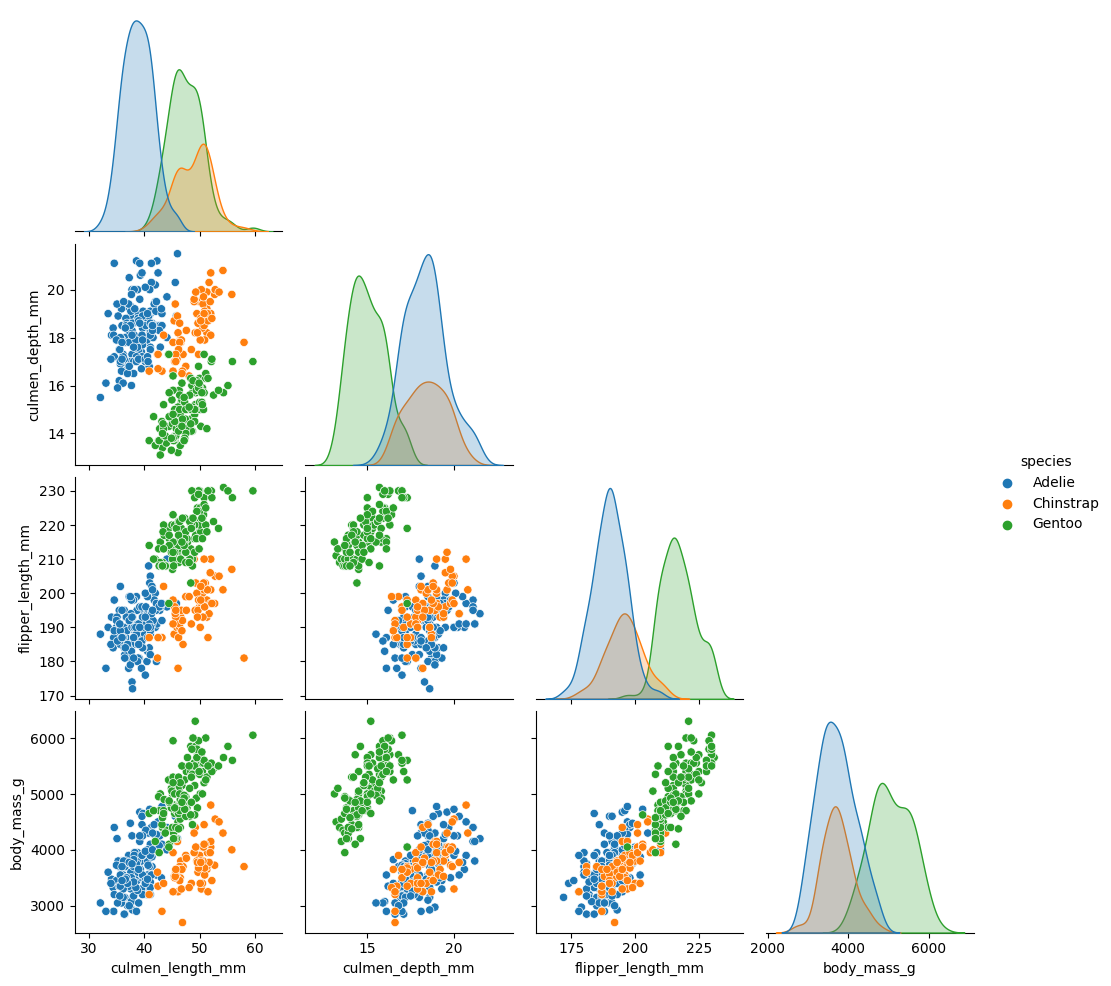

In [ ]:
import seaborn as sns

sns.pairplot(datos, hue = "species",
             corner = True)